In [1]:
import pandas as pd
import sklearn.cluster as clu
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import sklearn.ensemble as ens
import sklearn.preprocessing as pre

In [2]:
abalone=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
abalone.columns=['Sex', 'Len', 'Dia', 'Hei', 'WWei', 'SuWei', 'VWei', 'ShWei', 'Rin']
abalone['Fem']=(abalone['Sex']=='F')
abalone['I']=(abalone['Sex']=='I')
aux=abalone.pop('Sex')

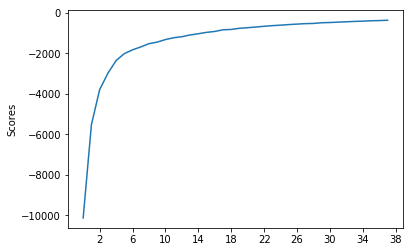

In [3]:
tr, ts=ms.train_test_split(abalone, test_size=.33)
tr1, tr2=ms.train_test_split(abalone, test_size=.5)
scores=[]
for s in range(2,40):
    km = clu.KMeans(n_clusters=s, random_state=0).fit(tr1)
    scores.append(km.score(tr1))
plt.plot(scores)
plt.ylabel('Scores')
plt.xticks(range(2,40, 4))
plt.show()

Hay un kink en 5 clusters, usaremos 5 y 9, debido a que hay un kink en 9 (ver abajo) en el caso normalizado

In [4]:
for clus in [5, 9]:
    print("Con ", clus, " clusters sin normalización")
    km = clu.KMeans(n_clusters=5, random_state=0).fit(tr1)
    tr2cc=tr2.copy()
    tscc=ts.copy()
    tr2cc['cl'] =km.predict(tr2)
    tscc['cl'] =km.predict(ts)
    prom=0
    for s in range(5):
        rfc=ens.RandomForestClassifier(n_estimators=100, max_depth=1).fit(tr2, tr2cc['cl']==s)
        aux=rfc.score(ts, tscc['cl']==s)
        prom=prom+aux/5
        print("La predicción para cluster ",s,"es ",int(aux*100),"%")
    print("La predicción promedio ",s,"es ",int(prom*100),"%")

Con  5  clusters sin normalización
La predicción para cluster  0 es  69 %
La predicción para cluster  1 es  92 %
La predicción para cluster  2 es  95 %
La predicción para cluster  3 es  74 %
La predicción para cluster  4 es  80 %
La predicción promedio  4 es  82 %
Con  9  clusters sin normalización
La predicción para cluster  0 es  69 %
La predicción para cluster  1 es  95 %
La predicción para cluster  2 es  95 %
La predicción para cluster  3 es  74 %
La predicción para cluster  4 es  80 %
La predicción promedio  4 es  83 %


Con normalizacion

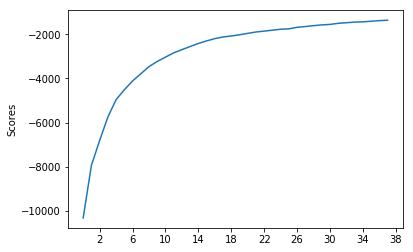

In [5]:
tr, ts=ms.train_test_split(abalone, test_size=.33)
tr1, tr2=ms.train_test_split(abalone, test_size=.5)
stand=pre.StandardScaler().fit(tr1)
tr1=pd.DataFrame(stand.transform(tr1))
tr2=pd.DataFrame(stand.transform(tr2))
ts=pd.DataFrame(stand.transform(ts))

scores=[]
for s in range(2,40):
    km = clu.KMeans(n_clusters=s, random_state=0).fit(tr1)
    scores.append(km.score(tr1))
plt.plot(scores)
plt.ylabel('Scores')
plt.xticks(range(2,40, 4))
plt.show()

El kink se movió, por eso usamos también 9.

In [6]:
for clus in [5, 9]:
    print("Con ", clus, " clusters sin normalización")
    km = clu.KMeans(n_clusters=5, random_state=0).fit(tr1)
    tr2cc=tr2.copy()
    tscc=ts.copy()
    tr2cc['cl'] =km.predict(tr2)
    tscc['cl'] =km.predict(ts)
    prom=0
    for s in range(5):
        rfc=ens.RandomForestClassifier(n_estimators=100, max_depth=1).fit(tr2, tr2cc['cl']==s)
        aux=rfc.score(ts, tscc['cl']==s)
        prom=prom+aux/5
        print("La predicción para cluster ",s,"es ",int(aux*100),"%")
    print("La predicción promedio ",s,"es ",int(prom*100),"%")

Con  5  clusters sin normalización
La predicción para cluster  0 es  77 %
La predicción para cluster  1 es  98 %
La predicción para cluster  2 es  95 %
La predicción para cluster  3 es  80 %
La predicción para cluster  4 es  78 %
La predicción promedio  4 es  86 %
Con  9  clusters sin normalización
La predicción para cluster  0 es  77 %
La predicción para cluster  1 es  98 %
La predicción para cluster  2 es  95 %
La predicción para cluster  3 es  80 %
La predicción para cluster  4 es  78 %
La predicción promedio  4 es  86 %


La predicción promedio mejoró en ambos casos para lo normalizado